# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [10]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [11]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Supervised - Raw Data

### Multilayer Perceptron

In [12]:
### MLP
from Models import MLP as MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [13]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [14]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

29/29 [==============================] - 0s 894us/step
MLP:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       787
         pos       0.91      0.93      0.92       139

    accuracy                           0.98       926
   macro avg       0.95      0.96      0.95       926
weighted avg       0.98      0.98      0.98       926

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       787
         pos       0.92      0.94      0.93       139

    accuracy                           0.98       926
   macro avg       0.95      0.96      0.96       926
weighted avg       0.98      0.98      0.98       926

-------- Results on False Positives for MLP --------
29/29 [==============================] - 0s 876us/step
Accuracy on False Positives: 0.52
False Positives Account for 54.55% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 37.6875
Averag

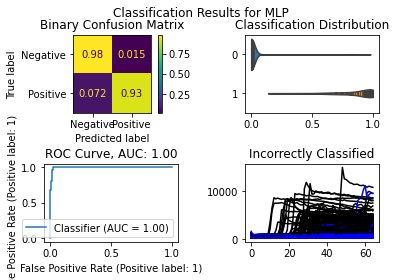

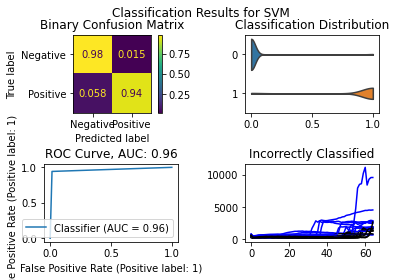

In [15]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Unsupervised - Analysis

### Create New Object

In [16]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [17]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([7457, 7350, 4278, ..., 3290, 3460, 8567])},
 {'KMeans': array([5245, 4775, 3810, ..., 1418, 4231, 5654])}]

### Train and Compare Unsupervised Models

KMeans:
              precision    recall  f1-score   support

         neg       0.88      1.00      0.93      7991
         pos       0.88      0.15      0.25      1273

    accuracy                           0.88      9264
   macro avg       0.88      0.57      0.59      9264
weighted avg       0.88      0.88      0.84      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.9077490774907749
False Positives Account for 0.28% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 27.48
Average RAF: 0.05550208784
Average MPR: 28.037870806
Average MS: 2548.02
Correctly Classified FP Characteristics:
Average Time to Threshold: 35.727560975609755
Average RAF: 0.031752113024390245
Average MPR: 6.246785722939024
Average MS: 451.8485772357724
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

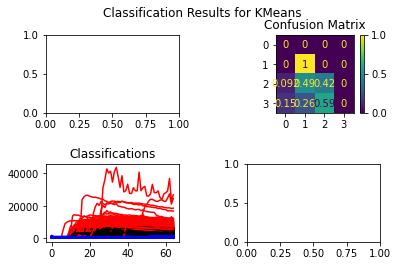

In [18]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised']);
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])